## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [3]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [4]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [5]:
mobile_sales.DATE.describe()

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_82589/20359885.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.DATE.describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [6]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


## Missing Values

<AxesSubplot:xlabel='DATE'>

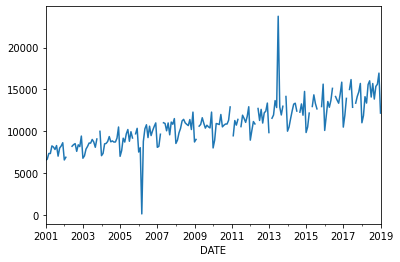

In [7]:
mobile_sales.Sales.plot()

In [8]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

In [9]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


#### No visible Patterns

#### Imputing with Mean/Median

In [10]:
mobile_sales.Sales.mean()

10842.757575757576

In [11]:
mobile_sales.Sales.median()

10745.0

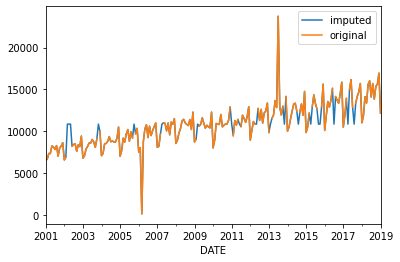

In [12]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

#### As shown above, it is not appropriate to impute with mean

#### Filling '0' at missing values?

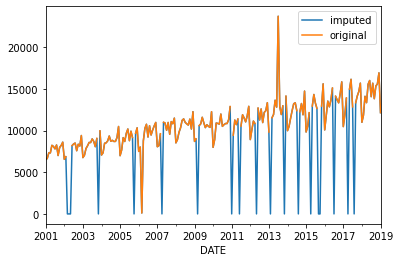

In [13]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

## Linear Interpolation

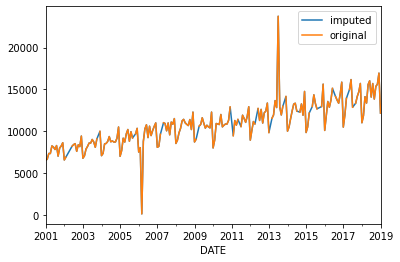

In [14]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()


In [15]:
# Let's save this interpolated signal 
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

## Detecting Anomalies

[]

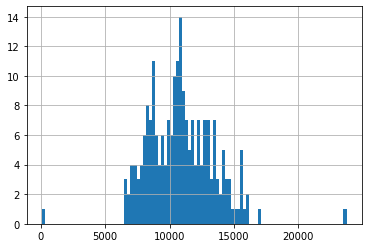

In [16]:
mobile_sales.Sales.hist(bins=100).plot()

In [17]:
mobile_sales.Sales.describe()

count      217.000000
mean     10873.046083
std       2571.620954
min        108.000000
25%       8923.000000
50%      10793.000000
75%      12555.500000
max      23740.000000
Name: Sales, dtype: float64

In [18]:
mobile_sales.Sales.quantile(0.95)

15164.599999999997

In [19]:
mobile_sales.Sales.quantile(0.05)

7307.8

#### Clipping off anomalies (5-98 percentile)

<AxesSubplot:xlabel='DATE'>

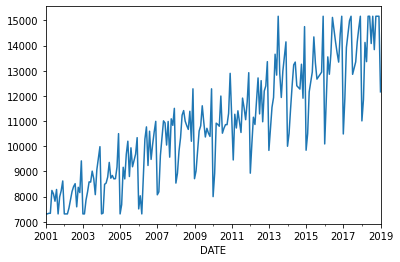

In [20]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()

<AxesSubplot:xlabel='DATE'>

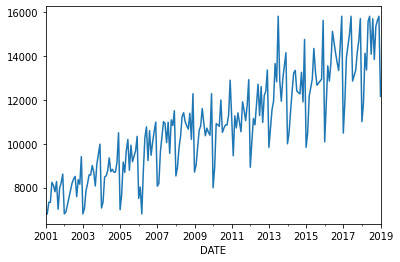

In [21]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02)).plot()

In [22]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

## Moving Averages

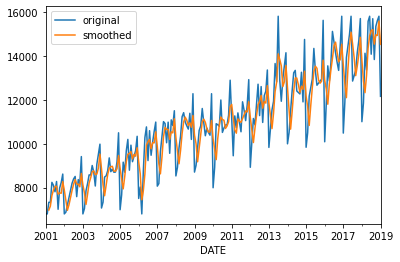

In [23]:
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(3, center=False).mean().plot(label='smoothed')

plt.legend()

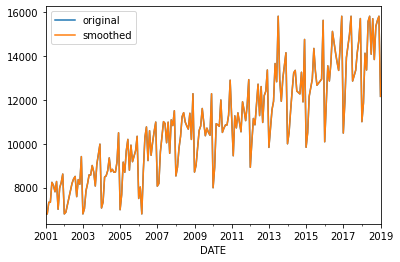

In [24]:
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(1, center=False).mean().plot(label='smoothed')

plt.legend()

#### Taking higher window size

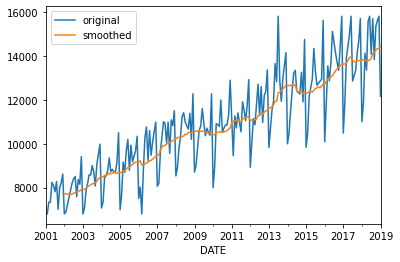

In [25]:
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(12, center=False).mean().plot(label='smoothed')

plt.legend()

#### Centered MA

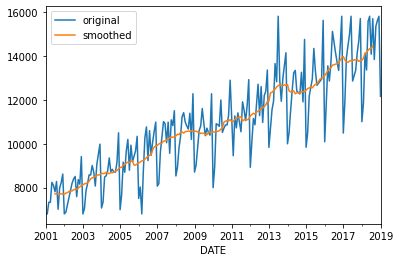

In [26]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12, center=True).mean().plot(label='smoothed')
plt.legend()

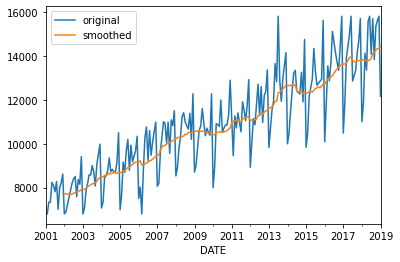

In [27]:
# set center = False
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12, center=False).mean().plot(label='smoothed')
plt.legend()

## Trend

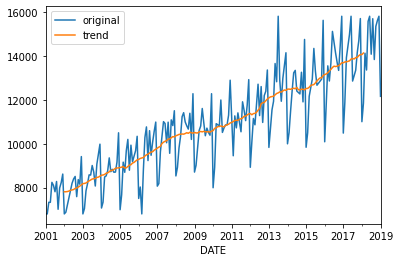

In [28]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(24, center=True).mean().plot(label='trend')

plt.legend()

---

# Preprocessing

<AxesSubplot:xlabel='DATE'>

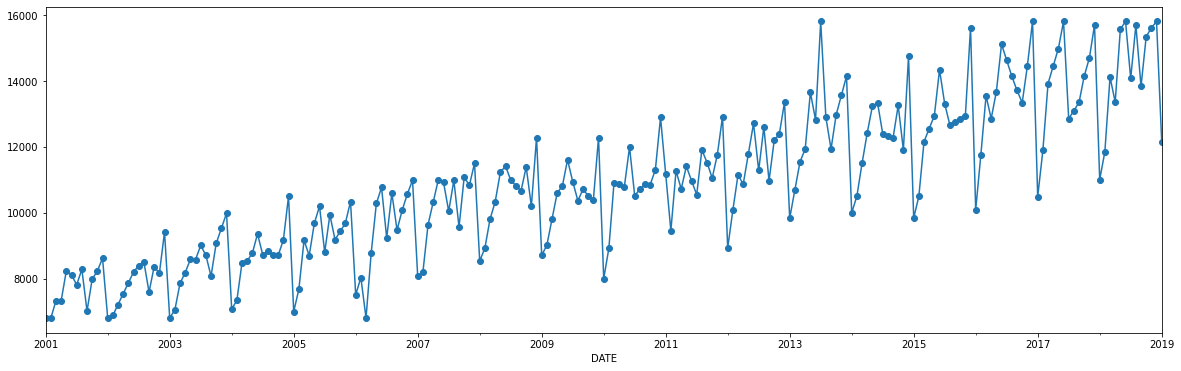

In [3]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE', inplace=True)

# linear interpolation 
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

# anomalies - clip quantiles
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

# plot
mobile_sales.Sales.plot(style='-o', figsize=(20,6))

In [47]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='multiplicative')

In [6]:
plt.rcParams['figure.figsize'] = (20, 6)

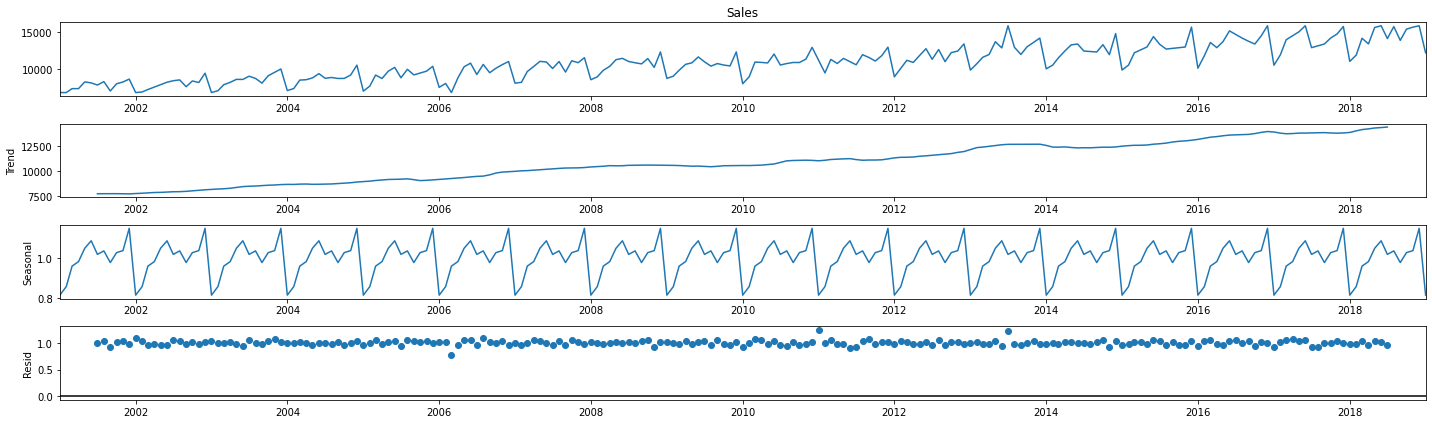

In [48]:
model.plot();

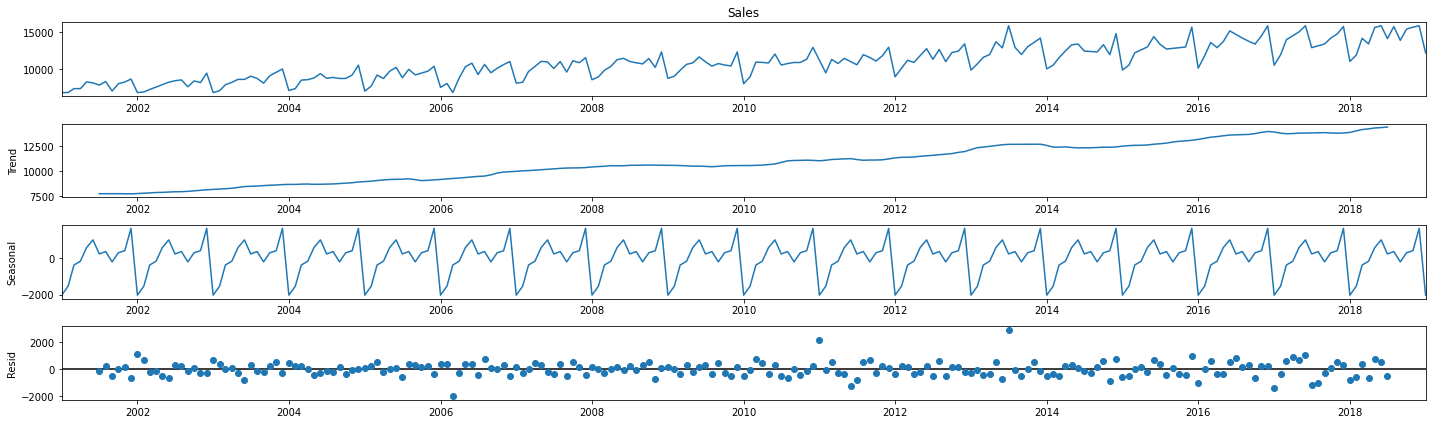

In [8]:
model.plot();

<AxesSubplot:xlabel='DATE'>

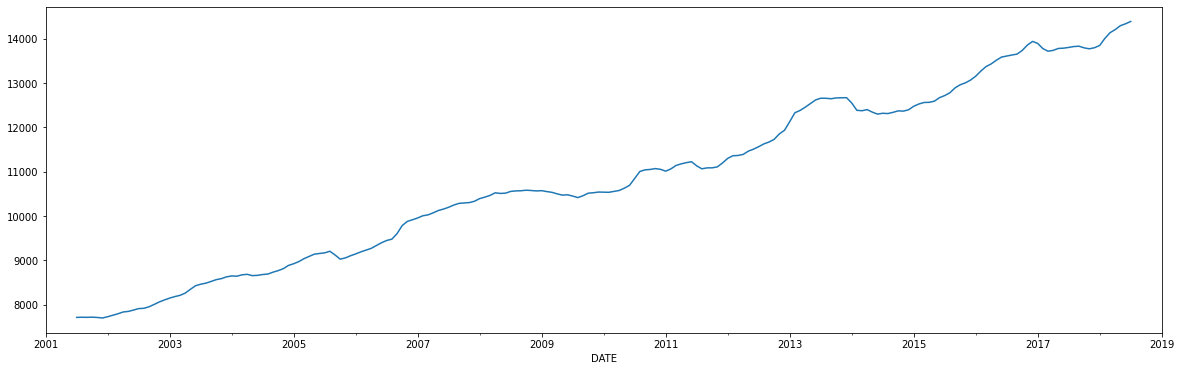

In [14]:
model.trend.plot()

<AxesSubplot:xlabel='DATE'>

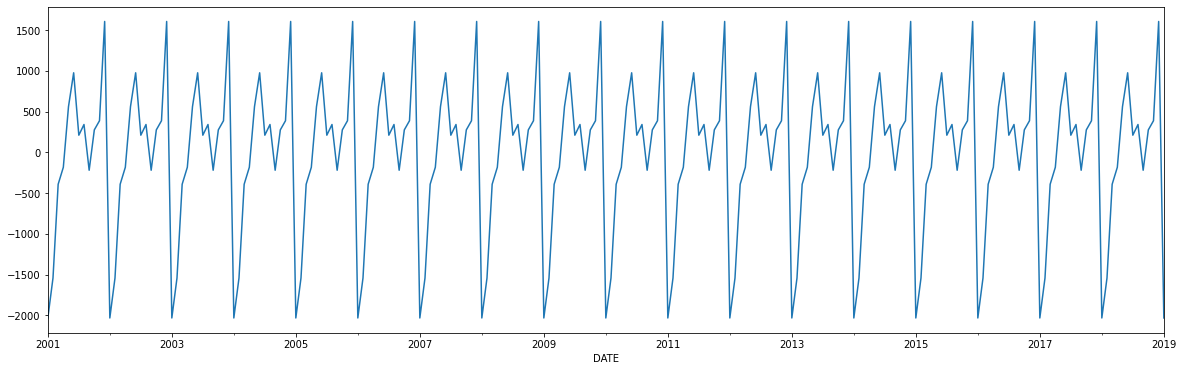

In [15]:
model.seasonal.plot()

<AxesSubplot:xlabel='DATE'>

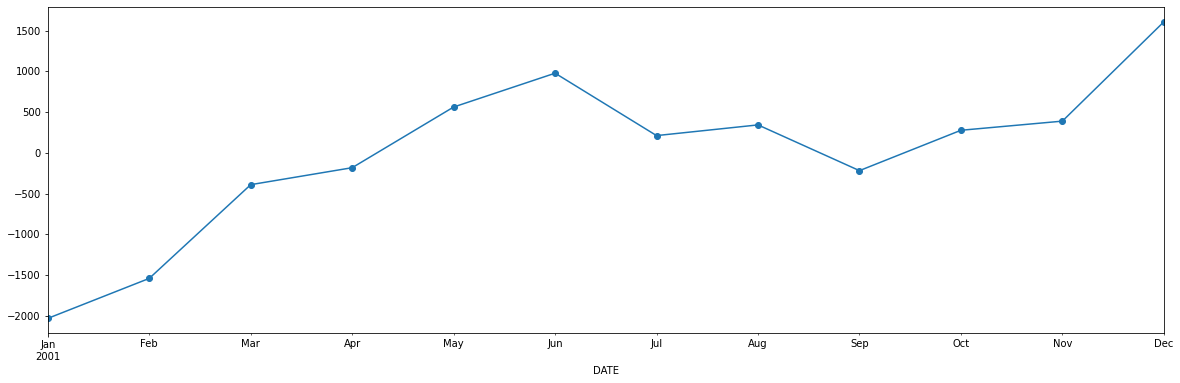

In [17]:
model.seasonal.iloc[:12].plot(style='-o')

In [21]:
model.resid.mean()

-3.2316417029766864

<AxesSubplot:ylabel='Density'>

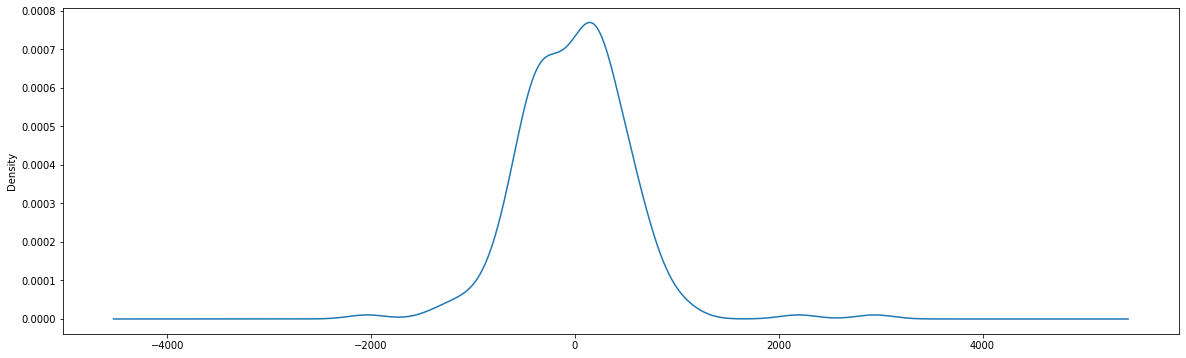

In [20]:
model.resid.plot(kind='kde')

## Implementation from scratch

**Trend**

domain knowlegde and observation through plot - seasonality = 12

<AxesSubplot:xlabel='DATE'>

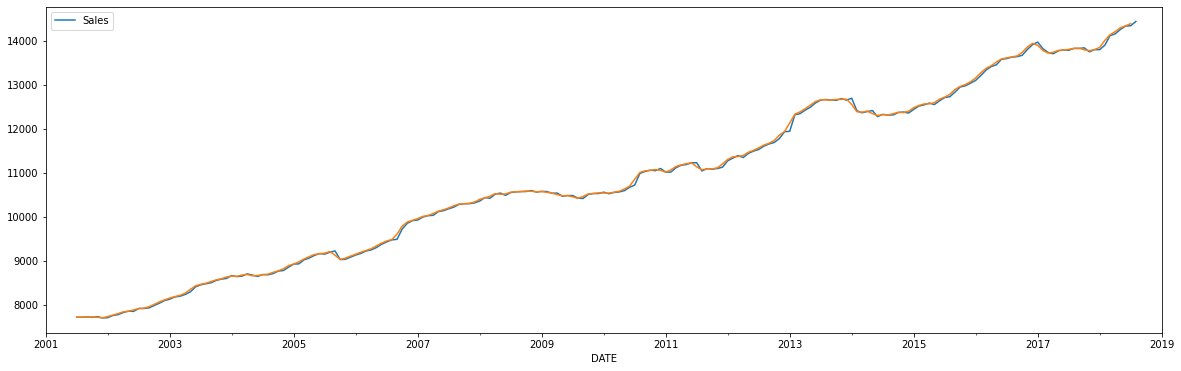

In [24]:
trend = mobile_sales.rolling(12, center=True).mean()
trend.plot()
model.trend.plot()

<AxesSubplot:xlabel='DATE'>

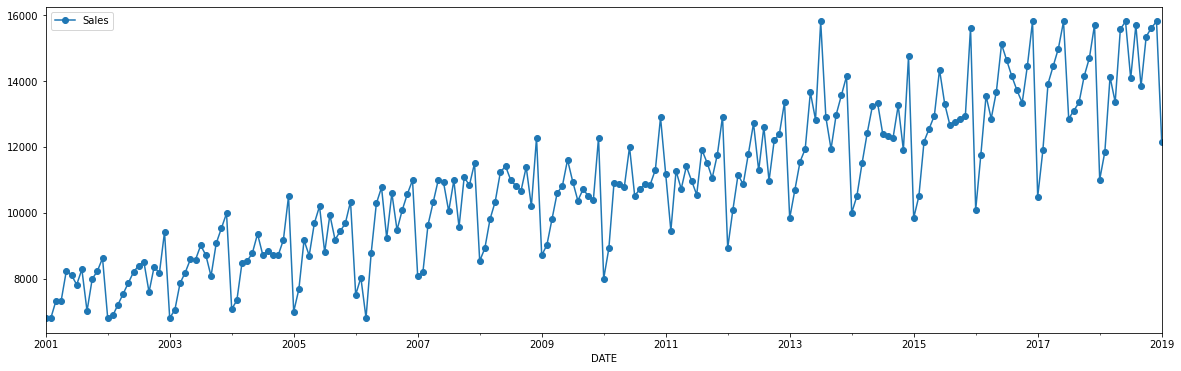

In [26]:
mobile_sales.plot(style='-o')

<AxesSubplot:xlabel='DATE'>

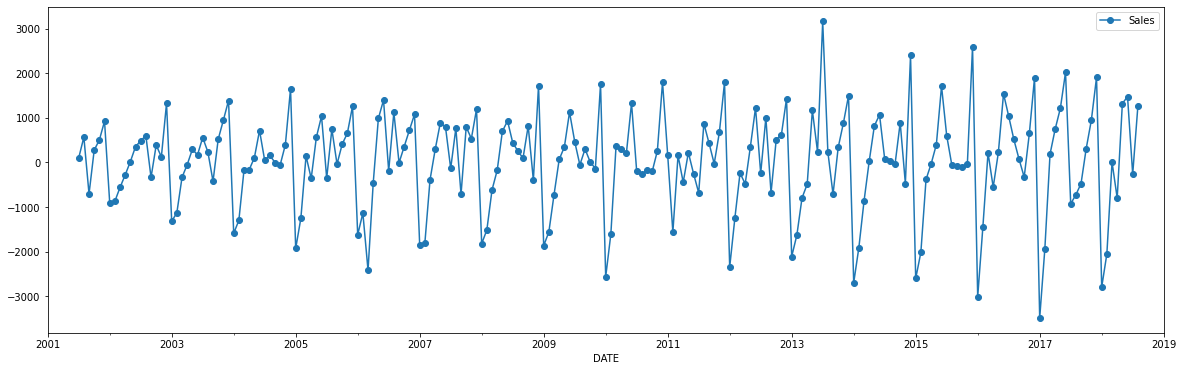

In [25]:
de_trend = mobile_sales - trend
de_trend.plot(style='-o')

In [27]:
# if my trend is wrong - error is very high
# if seasonality is wrong - error is lesser

<AxesSubplot:xlabel='DATE'>

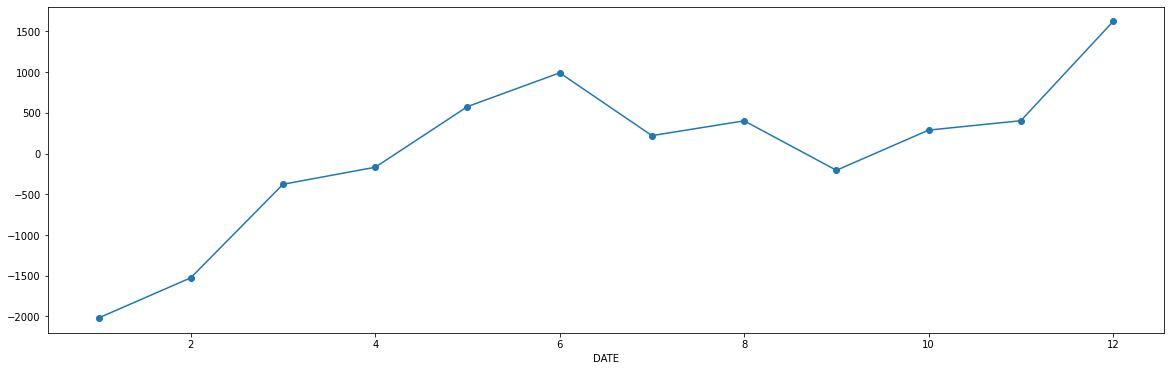

In [34]:
dtf = de_trend.reset_index()
dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')

<AxesSubplot:xlabel='DATE'>

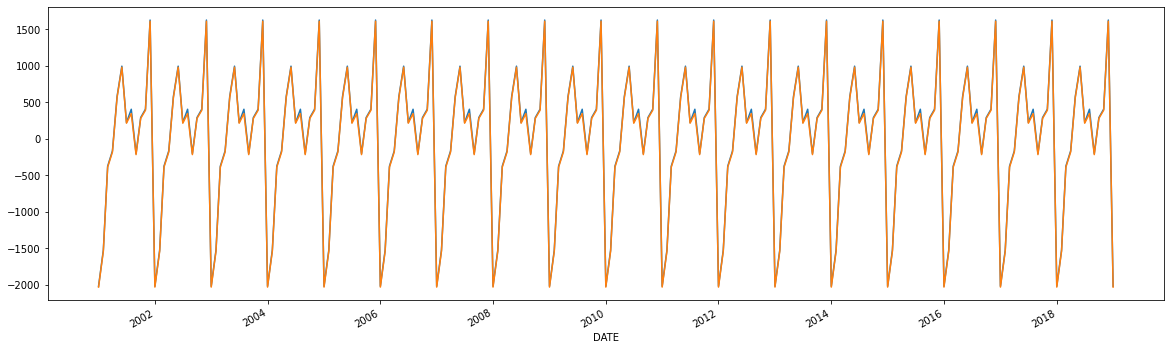

In [43]:
plt.plot(dtf.DATE, dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot()

<AxesSubplot:>

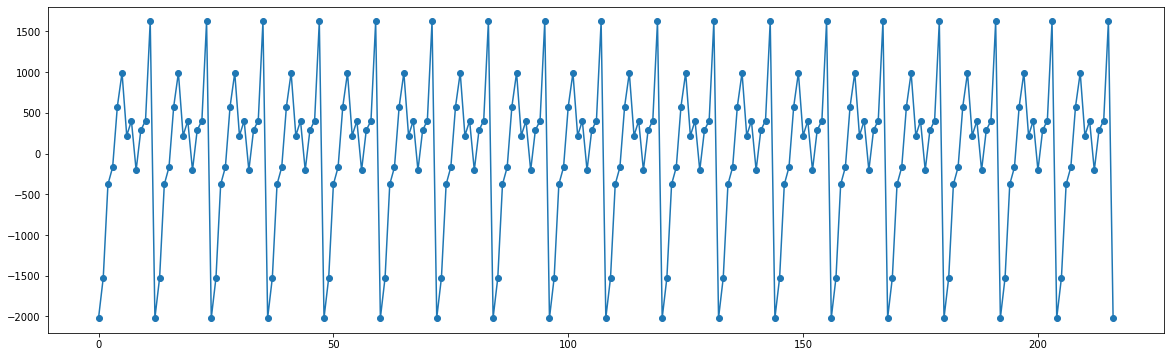

In [45]:
dtf['season'] = dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean')
dtf['season'].plot(style='-o')

<AxesSubplot:xlabel='DATE'>

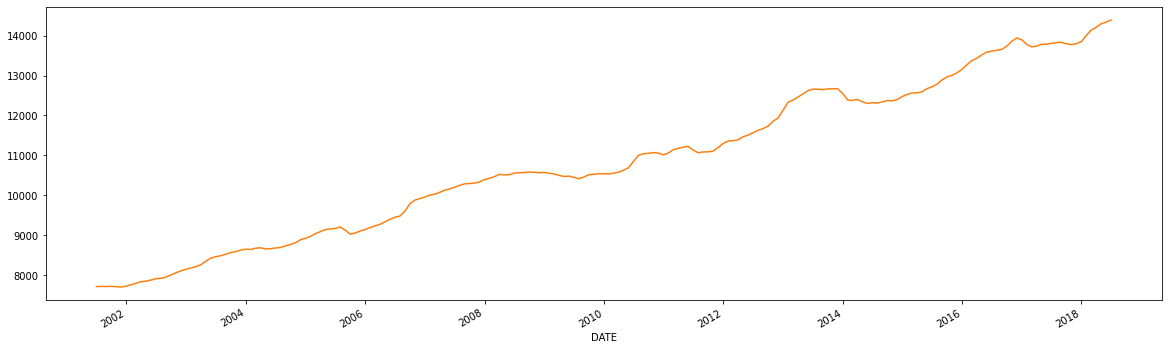

In [46]:
trend_2 = pd.Series((mobile_sales.values[:, 0] - dtf['season']).rolling(12, center=True).mean(), index=model.trend.index)
plt.plot(trend_2)
model.trend.plot()

# Simple Methods

In [49]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

In [50]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


### Naive Forecast

MAE : 3434.233
RMSE : 3697.005
MAPE: 0.23


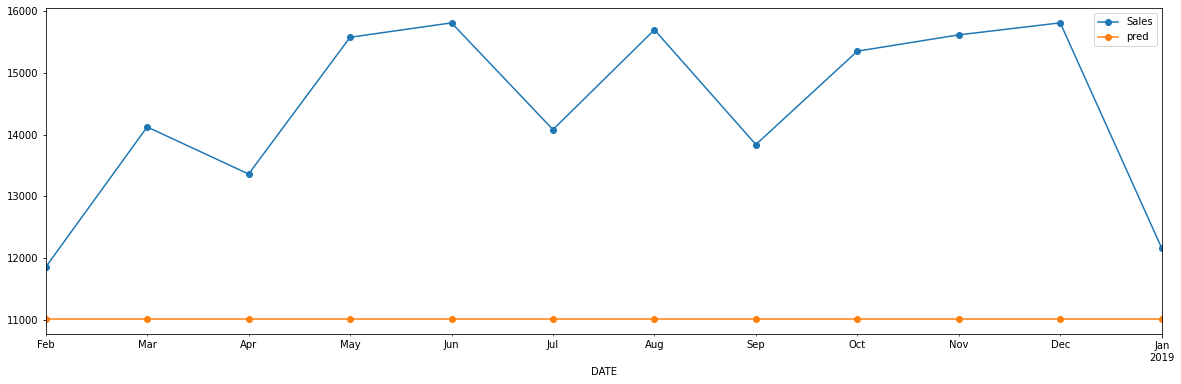

In [51]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## Mean Forecast

MAE : 3786.031
RMSE : 4025.906
MAPE: 0.255


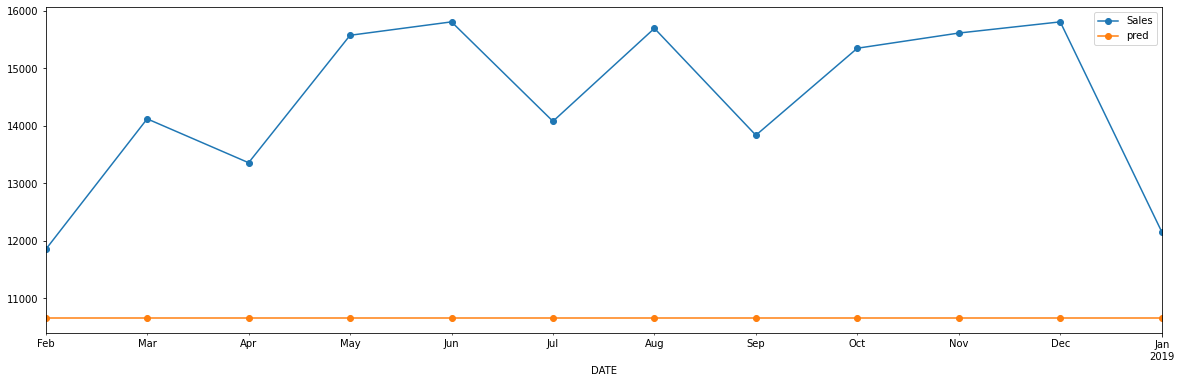

In [52]:
test_x['pred'] = train_x['Sales'].mean()

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## Seasonal Naive

In [54]:
test_x.index

DatetimeIndex(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

MAE : 800.867
RMSE : 1067.837
MAPE: 0.055


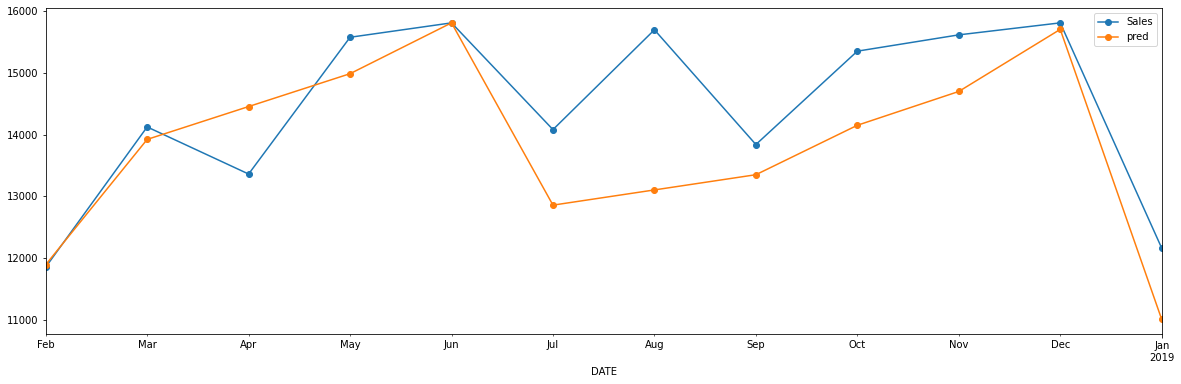

In [57]:
for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

## Drift Method

MAE : 1158.799
RMSE : 1421.33
MAPE: 0.086


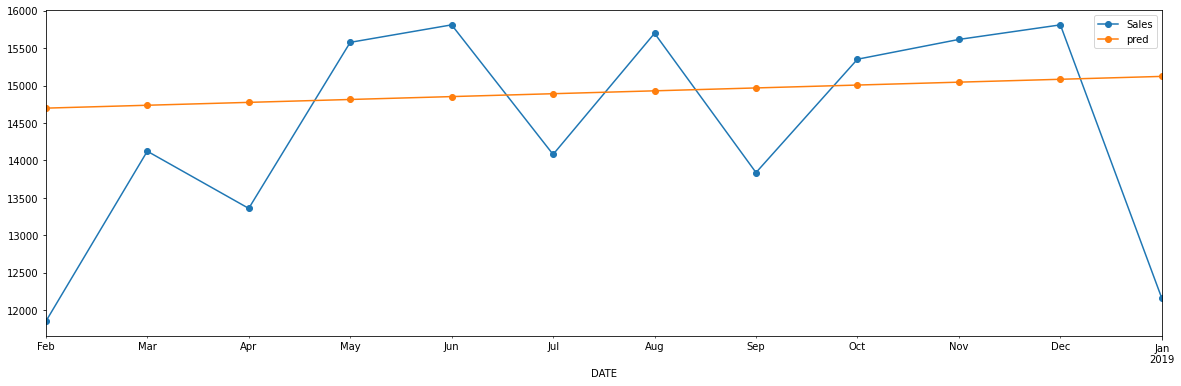

In [64]:
# Get the slope
y_t = train_x['Sales'][-3]

m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])